In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hf = pd.read_csv('heart_failure_clinical_records_dataset.csv',delimiter =',')

## Heart rate failure Data

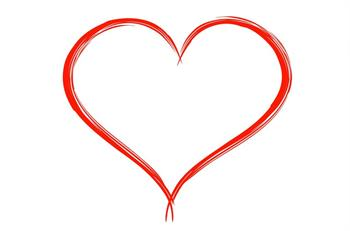

Data set: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.
Most cardiovascular diseases can be prevented by addressing behavioral risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity, and harmful use of alcohol using population-wide strategies.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidemia, or already established disease).
## Information about the literacy of this data set

In columns that represent an existing medical condition such as diabetes or anaemia the data is given as a binary answer, a 1 indicated that the patient has that condition.

The same format is used for the sex of the patient, with 1 representing a Male and 0 representing a Female


## Aim of analysis

All the paitents in this data set either have a CVD or are high cardiovascular risk.

    Of these paitnents what diseases put a person at a greater risk of death ? do attributes such as sex and age have an impact on the likely hood.
    what attributes are negatively associated with heart failure.
    what are some of the limitations of this data set? 

       

### Continuous vs non-continous data.
This will give us an indication of the depth of analysis that can be done with the data.
continuous columns can allow for more in-depth analysis.
   
    creatinine_phosphokinase -Level of the CPK enzyme in the blood (mcg/L)
    platelets - Platelets in the blood (kiloplatelets/mL)
    serum_creatinine - Level of serum creatinine in the blood (mg/dL)
    serum_sodium - Level of serum sodium in the blood (mEq/L)
    ejection_fraction -Percentage of blood leaving the heart at each contraction 
    time

Non continious columns
   
    age 
    initial boolean columns 
    anaemia - Decrease of red blood cells or hemoglobin (boolean)
    diabetes - If the patient has diabetes 
    high_blood_pressure - If the patient has hypertension
    sex  - Woman or man
    smoking - binary 
    DEATH_EVENT        

        

### My approach
To keep things tidy and focused, I will aim to break down the analysis into 3 tiers.

    Tier_one will be the occurrence of a death_event.
    Tier_two will aim to find variables that significantly influence the occurrence of a death_event.
    Tier_three aim to find the factors that influence tier_two. 

At the end of the report, I will sum up my conclusions and findings. With the addition of data quality metrics.
 

In [3]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
hf.rename(columns={'DEATH_EVENT':'death_event'},inplace=True)

# Initial exploration of continuous columns

In [6]:
hf[['age', 
    'creatinine_phosphokinase',
    'platelets',
    'serum_creatinine',
    'serum_sodium',
   'ejection_fraction']].describe()

,age,creatinine_phosphokinase,platelets,serum_creatinine,serum_sodium,ejection_fraction
count,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,263358.029264,1.39388,136.625418,38.083612
std,11.894809,970.287881,97804.236869,1.03451,4.412477,11.834841
min,40.000000,23.000000,25100.000000,0.50000,113.000000,14.000000
25%,51.000000,116.500000,212500.000000,0.90000,134.000000,30.000000
50%,60.000000,250.000000,262000.000000,1.10000,137.000000,38.000000
75%,70.000000,582.000000,303500.000000,1.40000,140.000000,45.000000
max,95.000000,7861.000000,850000.000000,9.40000,148.000000,80.000000


A Method to create distplots quickly.

In [7]:
class plt_distplot():
    def __init__ (self,df,var,col,ylabel= None,unit = None):
        if ylabel is None: 
            ylabel = 'count'
        fig = plt.figure(figsize=(7,5))
        sns.distplot(df.loc[df[var]==0,col],kde=False,label='n_death')
        sns.distplot(df.loc[df[var]==1,col],kde=False,label='death')
        plt.legend()        
        plt.ylabel(ylabel)
        if unit != None:
            plt.xlabel(col +' ('+unit+')')

C:\Users\windows\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


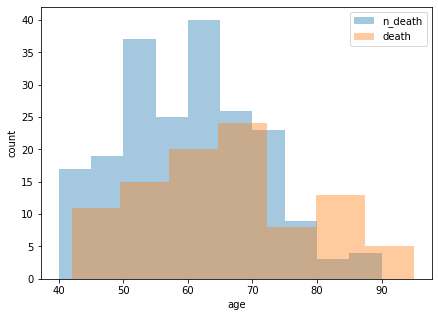

In [8]:
plt_distplot(hf,'death_event','age')
plt.show()

There appears to be a skew towards those of higher age and an increase in death_event count.


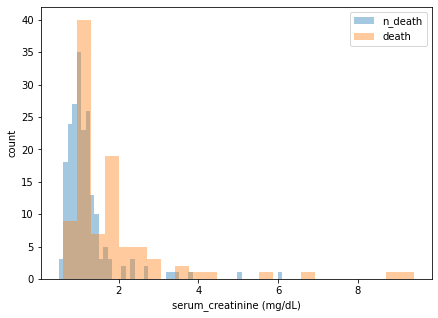

In [9]:
plt_distplot(hf,'death_event','serum_creatinine',unit='mg/dL')

There appears to be some significance between death_event and those with serum_c levels in the extremities.

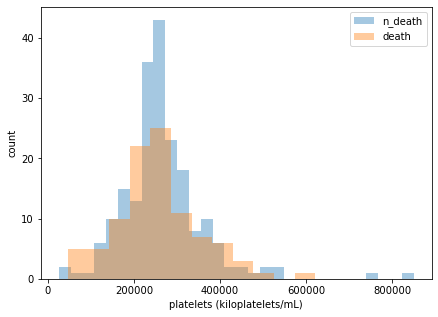

In [10]:
plt_distplot(hf,'death_event','platelets',unit='kiloplatelets/mL')

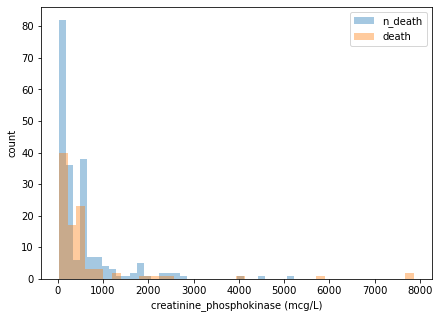

In [11]:
plt_distplot(hf,'death_event','creatinine_phosphokinase',unit='mcg/L')

There doesn't appear to be any significant difference in creatinine_phos levels between those who died and those who did not, except for in the extremities. It appears that creatinine_phos levels above 5500,cg/L resulted in a __death_Event__. However,  due to data limitations, it is not possible to make a claim. 

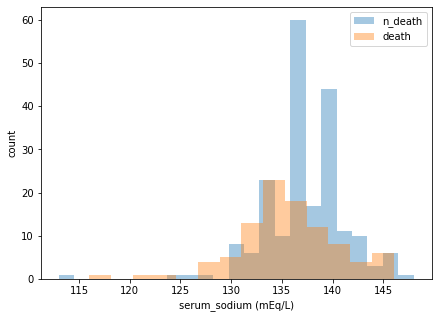

In [12]:
plt_distplot(hf,'death_event','serum_sodium',unit='mEq/L')

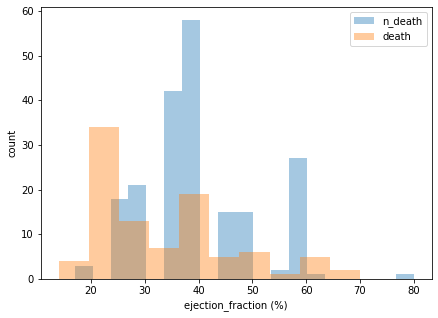

In [13]:
plt_distplot(hf,'death_event','ejection_fraction',unit='%')

There __does__ appear to be some significance in ejection_fraction(%) and the outcome of death_event.

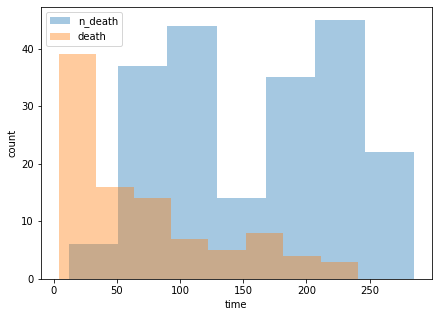

In [14]:
plt_distplot(hf,'death_event','time')

# Initial exploration of non-continuous columns 

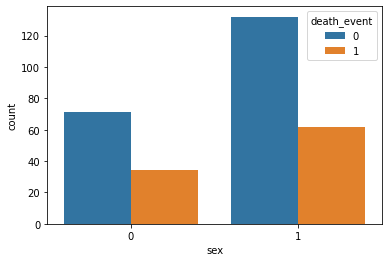

In [15]:
sns.countplot(data=hf,x='sex',hue='death_event')

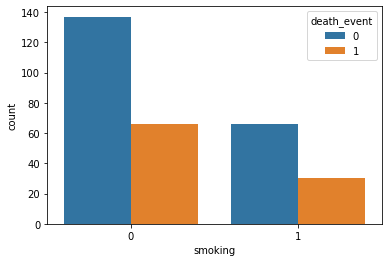

In [16]:
sns.countplot(data=hf,x='smoking',hue='death_event')

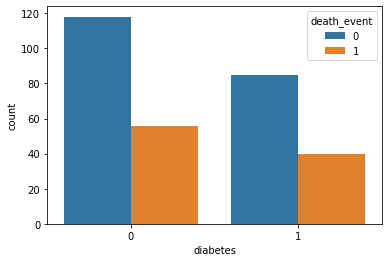

In [17]:
sns.countplot(data=hf,x='diabetes',hue='death_event')

No significance between those with or without diabetes and death_event.

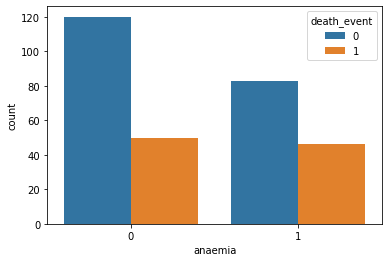

In [18]:
sns.countplot(data=hf,x='anaemia',hue='death_event')

In [19]:
an=hf[hf['anaemia']==1]
n_an = hf[hf['anaemia']==0]
g_an = an.groupby('death_event')['anaemia']
g_nan = n_an.groupby('death_event')['anaemia']

g_an2 = round(g_an.count()/g_an.count().sum(),2)
g_nan2 = (round(g_nan.count()/g_nan.count().sum(),2))
g_an2 = g_an2.rename('anaemia')
g_nan2 = g_nan2.rename('no_anaemia')

print('\n')
print(g_nan2)
print('\n')
print(g_an2)
print('\n')



death_event
0    0.71
1    0.29
Name: no_anaemia, dtype: float64


death_event
0    0.64
1    0.36
Name: anaemia, dtype: float64




It seems that paitients with __anaemia__ had an increase Death Event of 7% compared to those without 

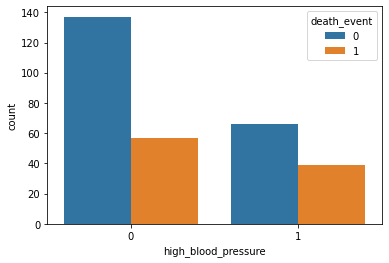

In [20]:
sns.countplot(data=hf,x='high_blood_pressure',hue='death_event')

In [21]:
hbp=hf[hf['high_blood_pressure']==1]
nhbp = hf[hf['high_blood_pressure']==0]
g_hbp = hbp.groupby('death_event')['high_blood_pressure']
g_nhbp = nhbp.groupby('death_event')['high_blood_pressure']

dn_hbp = round(g_nhbp.count()/g_nhbp.count().sum(),2)
h_hbp = round(g_hbp.count()/g_hbp.count().sum(),2)
dn_hbp = dn_hbp.rename('Does_not_have_HBP')
h_hbp = h_hbp.rename('Have_HBP')

print('\n')
print(dn_hbp)
print('\n')
print(h_hbp)
print('\n')



death_event
0    0.71
1    0.29
Name: Does_not_have_HBP, dtype: float64


death_event
0    0.63
1    0.37
Name: Have_HBP, dtype: float64




paitents with __high blood__ pressure had an increase in death_event of 8%.

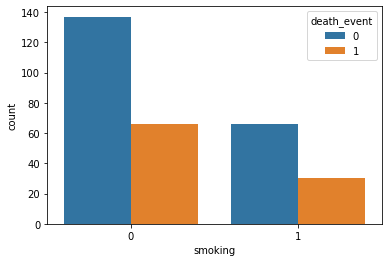

In [22]:
sns.countplot(data=hf,x='smoking',hue='death_event')

There appears to be no significance.

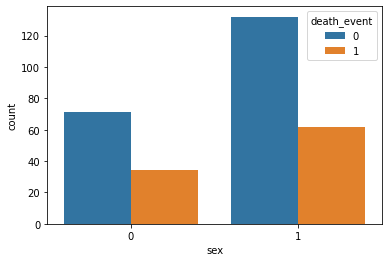

In [23]:
sns.countplot(data=hf,x='sex',hue='death_event')

### Columns of initial interest
    Age
    Serum creatinine
    Ejection fraction 
    Time

    High Blood pressure
    anemia


### Correlation heatmap between columns

__>0.2__ indicates a positive correlation. __<0.2__ indicates a negative correlation.


Text(0.5, 1.0, 'Correlation Heatmap')

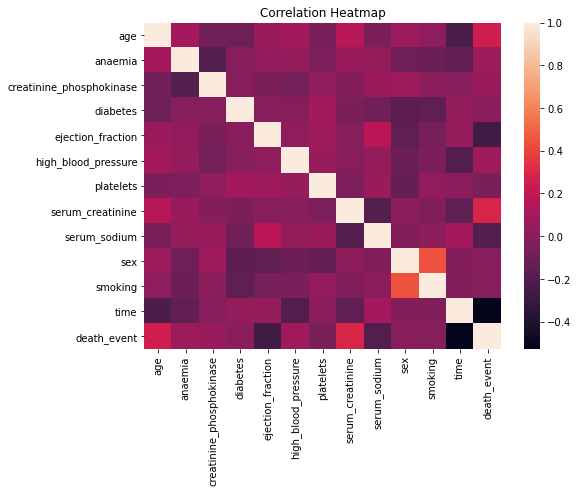

In [24]:
plt.figure(figsize=(8,6))
correlation = hf.corr()
sns.heatmap(correlation)
plt.title('Correlation Heatmap')

In [25]:
correlation['death_event'].sort_values()

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
death_event                 1.000000
Name: death_event, dtype: float64

__positive__ correlation.

In [26]:
correlation.loc[correlation['death_event'] >0.2,'death_event']

age                 0.253729
serum_creatinine    0.294278
death_event         1.000000
Name: death_event, dtype: float64

__negative__ correlation.

In [27]:
correlation.loc[correlation['death_event'] <-0.2,'death_event']

ejection_fraction   -0.268603
time                -0.526964
Name: death_event, dtype: float64

## The variables that correlated to death_event are:

    age
    serum_creatinine
    ejection_fraction
    time

These four columns drew attention in the initial investigation, minus high_blood_pressure, and anaemia which did not appear to have a high correlation to death event.

However, To ensure that these correlations are correct, further exploration will be necessary. Before that, I want to further explore secondary relationships to the above 4 to understand any secondary relationships. 

Text(0.5, 0.98, 'correlation heatmap (figure2).')

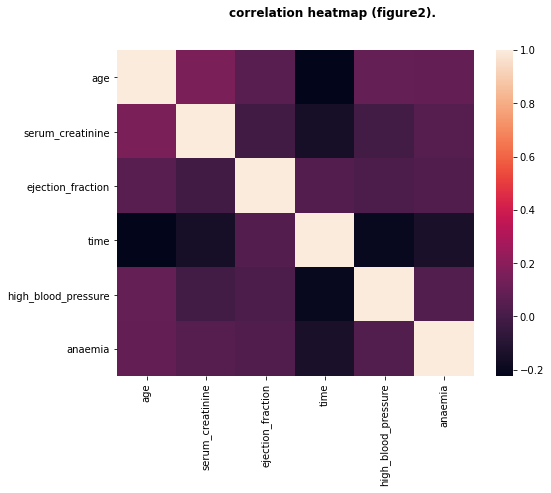

In [28]:
fig = plt.figure(figsize =(8,6))
high_corr = hf[['age',
    'serum_creatinine',
    'ejection_fraction', 
    'time',
    'high_blood_pressure',
     'anaemia']].corr()
sns.heatmap(high_corr)
fig.suptitle('correlation heatmap (figure2).',fontweight='bold')

In [29]:
((high_corr >0.2)|(high_corr <-0.2)) & (high_corr !=1)

,age,serum_creatinine,ejection_fraction,time,high_blood_pressure,anaemia
age,False,False,False,True,False,False
serum_creatinine,False,False,False,False,False,False
ejection_fraction,False,False,False,False,False,False
time,True,False,False,False,False,False
high_blood_pressure,False,False,False,False,False,False
anaemia,False,False,False,False,False,False


There seems to be only 1 correlation of any significance, between age and time. However this is not possible. Time appears to have allot of false correlations, i will investigate the strongest correlation before i discard the column from my analysis. 

In [30]:
high_corr.loc['time','age']

-0.22406841997203508

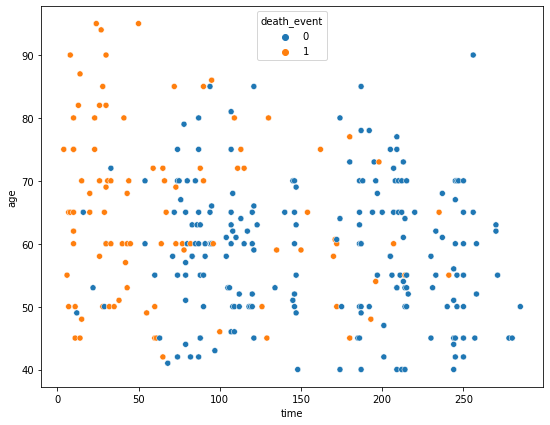

In [31]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=hf,x='time',y='age',hue='death_event')


After plotting a scatter plot my suspicions were confirmed, there is no relationship between age and time. 
Looking at the dist plot and the correlation heatmap it seems that the time variable is causing some issues. the format of the data is not intuitive and does not indicate its role within the dataset.  After exploring the original kaggle post, there seems to be no explanation for time. Because of this i will have to dismiss it from the analysis.

In [53]:
t_2correlation = correlation.loc[:,['age',
                                    'serum_creatinine',
                                    'ejection_fraction']]
t_2correlation.drop(['death_event',
                     'age',
                     'serum_creatinine',
                     'ejection_fraction',
                     'time',
                     'high_blood_pressure',
                     'anaemia'],inplace=True)
t_2correlation

,age,serum_creatinine,ejection_fraction
creatinine_phosphokinase,-0.081584,-0.016408,-0.044080
diabetes,-0.101012,-0.046975,-0.004850
platelets,-0.052354,-0.041198,0.072177
serum_sodium,-0.045966,-0.189095,0.175902
sex,0.065430,0.006970,-0.148386
smoking,0.018668,-0.027414,-0.067315


There appears to be no significant correlation between other columns and age,serum_creatinine, and ejection_fraction.

### Final investigation of Age, Serum_creatinine and Ejection_fraction

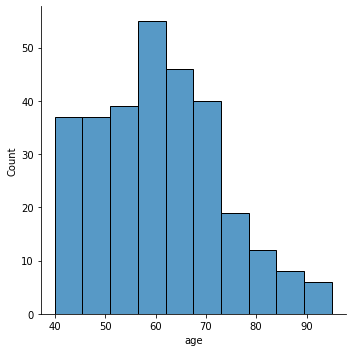

In [33]:
sns.displot(hf, x="age")


In [34]:
hf['age'].describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

75% of the data entries are between 50 and 70. This is not an even distribution and may influence the correlation between age and death_event.  

In [55]:
#trying to get an equal count for each group. 
over_60=(hf.loc[hf.loc[:,'age']>60,'age'].count())
under_60=(hf.loc[hf.loc[:,'age']<60,'age'].count())

print('over 60 data count:',over_60)
print('under 60 data count:',under_60)

over 60 data count: 137
under 60 data count: 129


In [56]:
over_60_deaths = hf.loc[hf.loc[:,'age']>60,'death_event'].sum()
under_60_deaths = hf.loc[hf.loc[:,'age']<60,'death_event'].sum()

In [57]:
data_f = {'over_60':over_60_deaths,'under_60':under_60_deaths}
freq_s = pd.Series(data_f)

2.6346153846153846


Text(0.5, 1.0, 'Over_60')

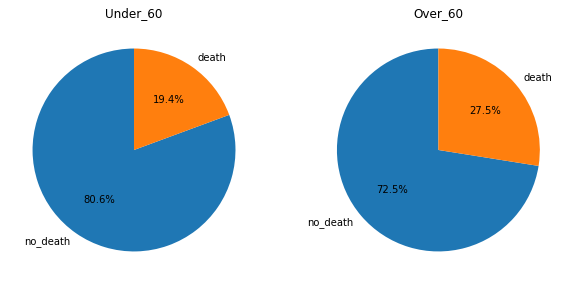

In [74]:
age_pie =[over_60,over_60_deaths,
          under_60,under_60_deaths]

a_label = ['no_death','death']

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[1].pie(age_pie[0:2],labels=a_label,startangle=90,autopct='%1.1f%%')
ax[0].pie(age_pie[2:4],labels=a_label,startangle=90,autopct='%1.1f%%')
print(over_60/over_60_deaths)
ax[0].set_title('Under_60')
ax[1].set_title('Over_60')




Because there is an even distribution of data on either side of 60, It seems a good place to start when assessing the impact of age on death_event.

At a ratio of 1:1.42 for every death under_60.

Text(0.5, 1.0, 'Age vs Death_Event')

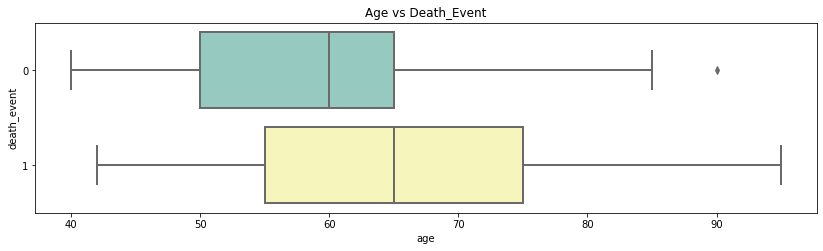

In [72]:
fig = plt.figure(figsize=(14,3.5))
plt.yticks(rotation='0')
sns.boxplot(y='death_event',
            x='age',
            data=hf,
            orient = 'h',
            palette ='Set3',
            linewidth=2,
            )
plt.title('Age vs Death_Event')

When grouping by death_event, the mean age of those who died is 5years higher than those who didn't. 

## Serum_creatinine

Results of the creatinine blood test are measured in milligrams per deciliter or micromoles per liter.
The normal range for creatinine in the blood is between 0.84 to 1.21.

Generally speaking, a high serum creatinine level means that your kidneys aren't working well. 

https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646

Text(0.5, 0, 'serum_creatinine(mg/dL)')

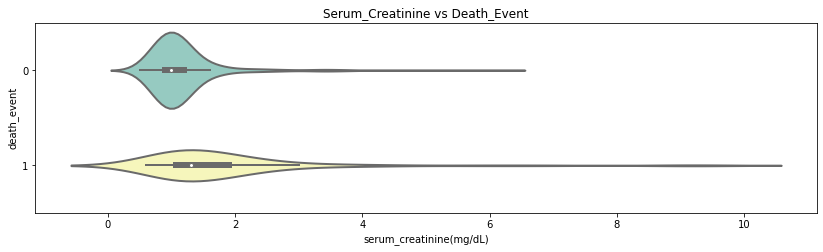

In [75]:
plt.figure(figsize=(14,3.5))
plt.yticks(rotation='0')
sns.violinplot(y='death_event',
            x='serum_creatinine',
            data=hf,
            orient = 'h',
            palette ='Set3',
            linewidth=2,
            )
plt.title('Serum_Creatinine vs Death_Event')
plt.xlabel('serum_creatinine(mg/dL)')


While the majority of the data in both variables seem to occupy the same area, of between 0 and 1.2. There is a significant increase in the number of extremities in those with a positive death_event.

In [41]:
serum_c = hf.groupby('death_event')['serum_creatinine']

In [42]:
serum_c.mean()

death_event
0    1.184877
1    1.835833
Name: serum_creatinine, dtype: float64

In [43]:
hf.loc[hf['death_event']==0,'serum_creatinine'].std()

0.654082654120788

In [44]:
hf.loc[hf['death_event']==1,'serum_creatinine'].std()

1.4685615351275343


From both the graph and aggregation, the difference in serum_creatinine levels is apparent. 

Of those who did not suffer a death_event the mean serum_c levels were __1.18__, within the normal range.

Of those who did suffer a death_event the mean serum_c levels were __1.84__, well outside the normal range.

There also appears to be a large difference in __standard_deviation__ between groups.
    
    Groups in death_event 0 had a serum_creatinine standard_deviation of 0.65.
    Groups in death_event 1 had a serum_creatinine standard_deviation of 1.47.




In [45]:
cat_hf = hf.copy()

In [60]:

def convert(serum_value):
    if serum_value >= 0.84 and serum_value <= 1.21:
        return 'normal'
    elif serum_value>1.21:
        return 'high'
    elif serum_value<0.84:
        return 'low'
 

In [61]:
#applying the convert function to a copy of the data base to catogorize serum_creatitine
cat_hf['serum_creatinine_range'] = cat_hf['serum_creatinine'].apply(convert)


Text(0.5, 1.0, 'Serum_Creatinine ranges vs Age')

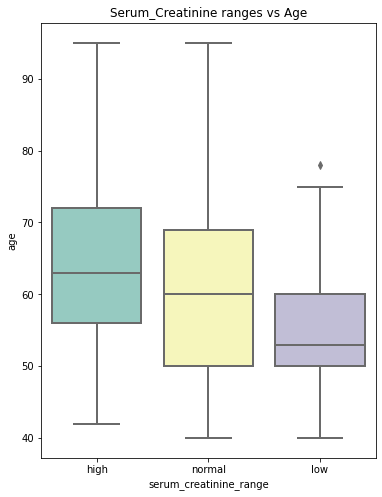

In [65]:
plt.figure(figsize=(6,8))
plt.yticks(rotation='0')
sns.boxplot(y='age',
            x='serum_creatinine_range',
            data=cat_hf,
            orient = 'v',
            palette ='Set3',
            linewidth=2,
            )
plt.title('Serum_Creatinine ranges vs Age')

Exploring the range of age, for the 3 serum_creatinine ranges that I made.

not surprisingly patients within the high serum_creatinine_range had the highest mean age.

# Quality of data 

In [63]:
ratio_db = hf.copy()

sex_ratio = ratio_db['sex'].value_counts()
death_ratio =ratio_db['death_event'].value_counts()

In [50]:
def age_split(age):
    age = np.around((age/10),0)*10
    return age

In [51]:
ages = ratio_db['age'].apply(age_split)
age_ratio = ages.value_counts()
age_label = ages.unique()

Text(0.5, 1.0, 'Age')

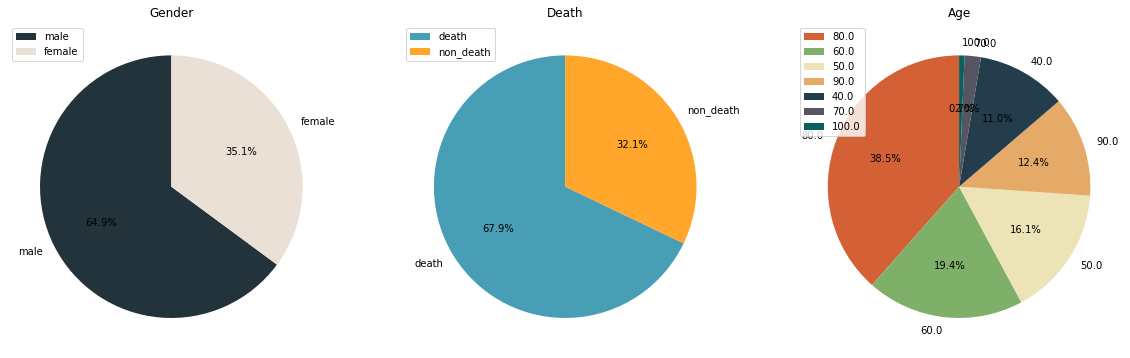

In [52]:
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie
fig1, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,15))
ax1.pie(sex_ratio, labels=['male','female'], autopct='%1.1f%%', startangle=90,colors = ['#22333B','#EAE0D5'])
ax2.pie(death_ratio, labels=['death','non_death'], autopct='%1.1f%%', startangle=90,colors=['#489FB5','#FFA62B'])
ax3.pie(age_ratio, labels = age_label, autopct='%1.1f%%', startangle=90,
        colors=['#D36135','#7FB069','#ECE4B7','#E6AA68','#233D4D','#585563','#08605F'])
ax1.legend()
ax2.legend()
ax3.legend()

ax1.set_title('Gender')
ax2.set_title('Death')
ax3.set_title('Age')

## Conclusion

There is a link between an increase in __age__ and an increase in the occurrence of death_event. However, there needs to be a better distribution of age ranges within the data.

There is a much larger proportion of male patients, however, there appears to be no correlation between __sex__ and death_event.

High __Serum_creatinine__ levels also positively influenced the occurrence of a death_event. The mean serum_c levels of those who did not die were considered within the normal range. The mean serum_c of those who died were 1.81 well above the normal levels. However, the mean of 1.81 for those who died has a significantly larger __standard deviation__ of 1.47 compared to 0.65. This could indicate that more data is needed for this group.

__High blood pressure__ and __Anaemia__, although they did not have a high correlation, there does seem to be some influence on the death_event.

It appears that patients with __Ejection_fraction__ percentages below 30% had a much higher chance of death.
The time I was not able to consider the variable time in my analysis, the formating was not intuitive. Also, some of the correlations made no sense such as time and age. Because of this it was discarded from the analysis and ignored.



